In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [2]:
df_fhs = pd.read_csv('framingham.csv')

In [3]:
df_fhs.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df_fhs.shape

(4240, 16)

In [5]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df_fhs.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


In [8]:
#find missing value
df_fhs.isnull()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#filtering dataset
#which columns are missing values and what is the extent of the missingness
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
TenYearCHD        0.000
dtype: float64

In [10]:
import missingno as msno


In [11]:
!pip install missingno

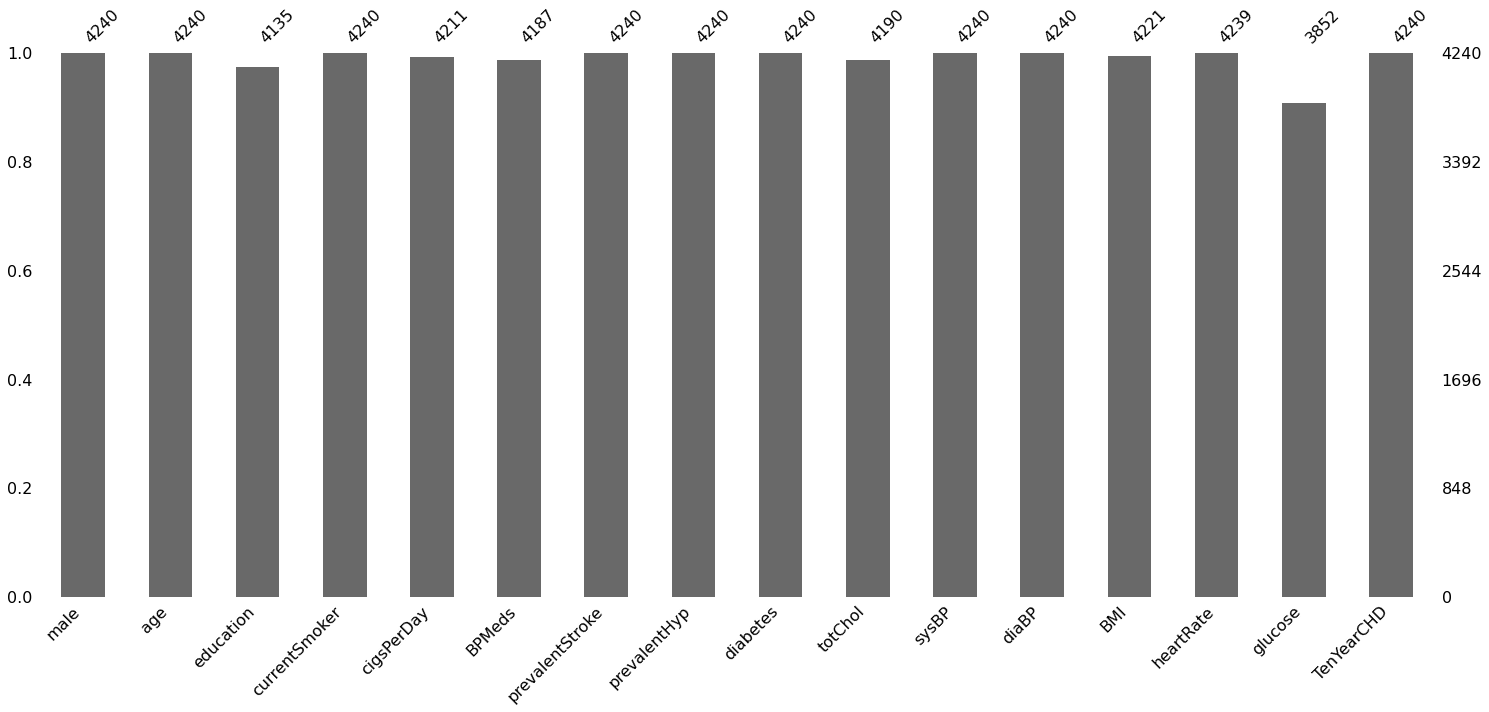

In [11]:
#visualizing relative missingness of the columns
msno.bar(df_fhs)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

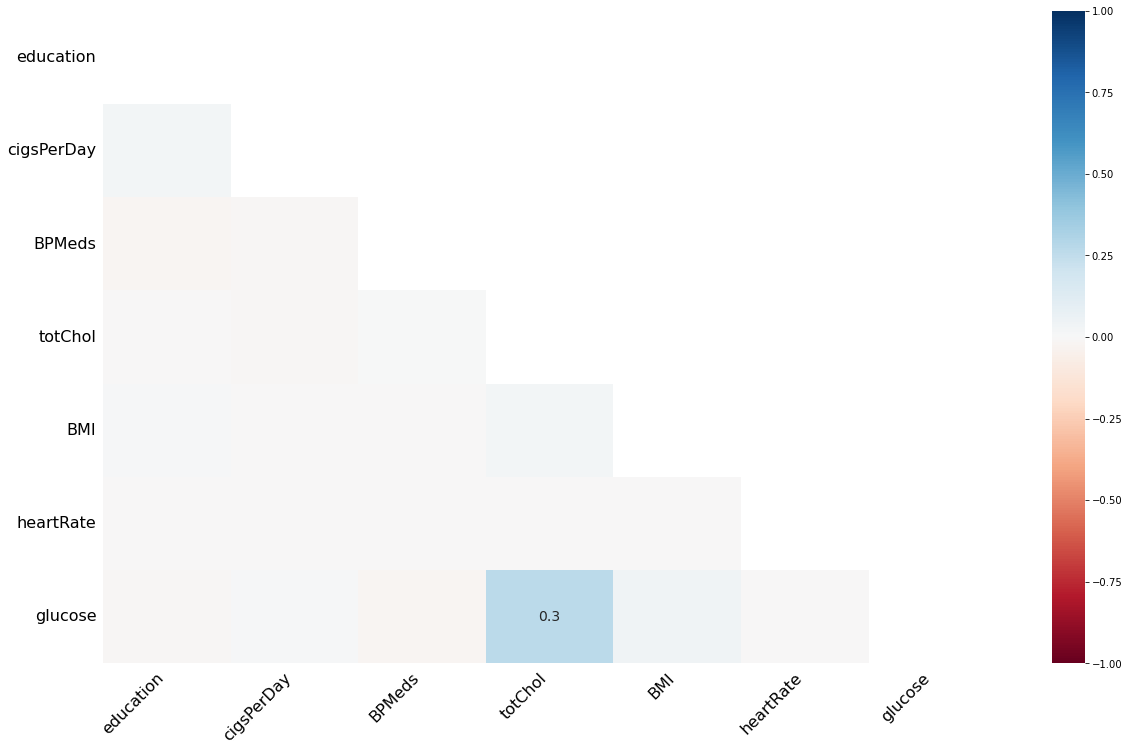

In [12]:
msno.heatmap(df_fhs)
plt.show

In [13]:
#most columns are missing values;two columns are missing 2% 
df_fhs['totChol'] = df_fhs['totChol'].fillna(df_fhs['totChol'].mean())
df_fhs['glucose'] = df_fhs['glucose'].fillna(df_fhs['glucose'].mean())

In [14]:
(df_fhs.isnull().sum())*100/len(df_fhs)

male              0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [15]:
#drop rows with >10% missingness
df_fhs = df_fhs.dropna()

In [16]:
(df_fhs.isnull().sum())*100/len(df_fhs)

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [17]:
#checking for row duplicates
df_fhs.duplicated()#.sum()

0       False
1       False
2       False
3       False
4       False
        ...  
4234    False
4236    False
4237    False
4238    False
4239    False
Length: 4036, dtype: bool

In [18]:
df_fhs.duplicated().sum()

0

In [19]:
#to check specific duplicates
df_fhs.duplicated(['education'])

0       False
1       False
2       False
3       False
4        True
        ...  
4234     True
4236     True
4237     True
4238     True
4239     True
Length: 4036, dtype: bool

In [20]:
df_fhs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4036 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4036 non-null   int64  
 1   age              4036 non-null   int64  
 2   education        4036 non-null   float64
 3   currentSmoker    4036 non-null   int64  
 4   cigsPerDay       4036 non-null   float64
 5   BPMeds           4036 non-null   float64
 6   prevalentStroke  4036 non-null   int64  
 7   prevalentHyp     4036 non-null   int64  
 8   diabetes         4036 non-null   int64  
 9   totChol          4036 non-null   float64
 10  sysBP            4036 non-null   float64
 11  diaBP            4036 non-null   float64
 12  BMI              4036 non-null   float64
 13  heartRate        4036 non-null   float64
 14  glucose          4036 non-null   float64
 15  TenYearCHD       4036 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 536.0 KB


# EDA: CORRELATION AMONG VARIABLES

In [21]:
#what is the correlation between the features
corr_fhs = df_fhs.corr(method='pearson')
corr_fhs

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000,-0.024,0.014,0.197,0.320,-0.052,-0.003,0.008,0.017,-0.068,-0.034,0.059,0.080,-0.118,0.002,0.091
age,-0.024,1.000,-0.163,-0.213,-0.191,0.126,0.045,0.305,0.102,0.268,0.392,0.208,0.135,-0.010,0.113,0.224
education,0.014,-0.163,1.000,0.018,0.008,-0.011,-0.028,-0.080,-0.034,-0.023,-0.128,-0.064,-0.137,-0.057,-0.031,-0.053
currentSmoker,0.197,-0.213,0.018,1.000,0.770,-0.047,-0.033,-0.105,-0.039,-0.049,-0.130,-0.110,-0.165,0.056,-0.051,0.021
cigsPerDay,0.320,-0.191,0.008,0.770,1.000,-0.046,-0.034,-0.068,-0.035,-0.026,-0.090,-0.055,-0.088,0.070,-0.052,0.057
BPMeds,-0.052,0.126,-0.011,-0.047,-0.046,1.000,0.126,0.261,0.046,0.085,0.259,0.196,0.102,0.017,0.052,0.090
prevalentStroke,-0.003,0.045,-0.028,-0.033,-0.034,0.126,1.000,0.067,0.010,0.008,0.055,0.049,0.031,-0.012,0.016,0.044
prevalentHyp,0.008,0.305,-0.080,-0.105,-0.068,0.261,0.067,1.000,0.073,0.164,0.695,0.617,0.303,0.151,0.083,0.176
diabetes,0.017,0.102,-0.034,-0.039,-0.035,0.046,0.010,0.073,1.000,0.044,0.098,0.048,0.080,0.049,0.605,0.092
totChol,-0.068,0.268,-0.023,-0.049,-0.026,0.085,0.008,0.164,0.044,1.000,0.213,0.170,0.122,0.088,0.048,0.082


<function matplotlib.pyplot.show(close=None, block=None)>

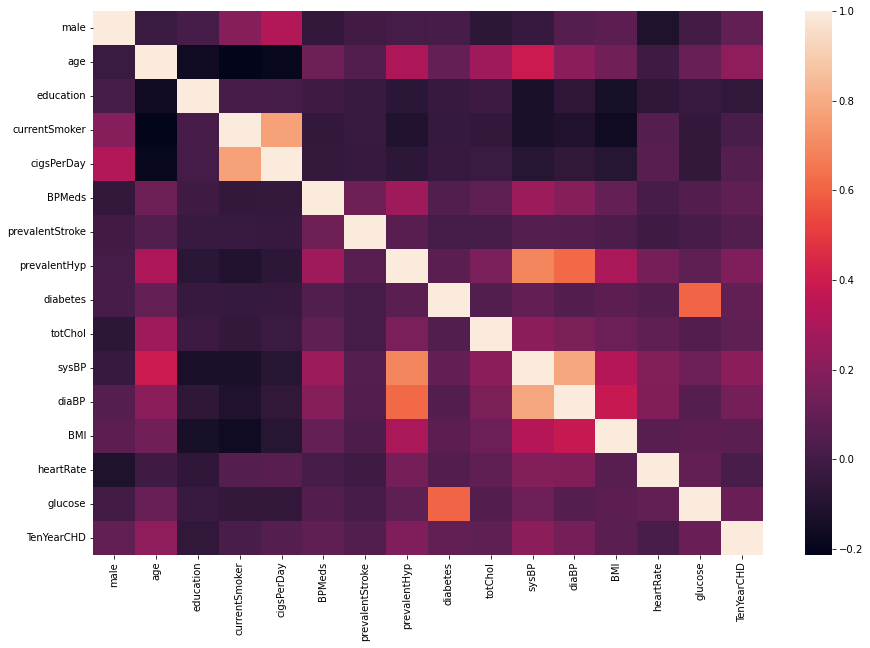

In [22]:
#generate the heatmap of correlation
#the lighter the colour the stronger the positive correlation
#Pearson does linear correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr_fhs)
plt.show

In [23]:
#to get the correlation table
corr_targ = df_fhs.corr()['TenYearCHD'].abs().sort_values()
corr_targ

currentSmoker     0.021
heartRate         0.022
prevalentStroke   0.044
education         0.053
cigsPerDay        0.057
BMI               0.072
totChol           0.082
BPMeds            0.090
male              0.091
diabetes          0.092
glucose           0.116
diaBP             0.148
prevalentHyp      0.176
sysBP             0.215
age               0.224
TenYearCHD        1.000
Name: TenYearCHD, dtype: float64

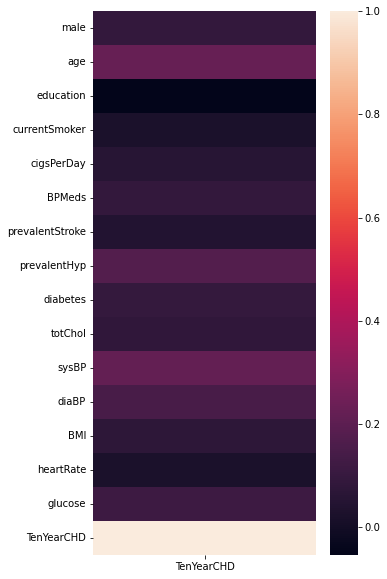

In [24]:
corr_targ = df_fhs.corr()['TenYearCHD'].abs().sort_values(ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(corr_fhs[['TenYearCHD']])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

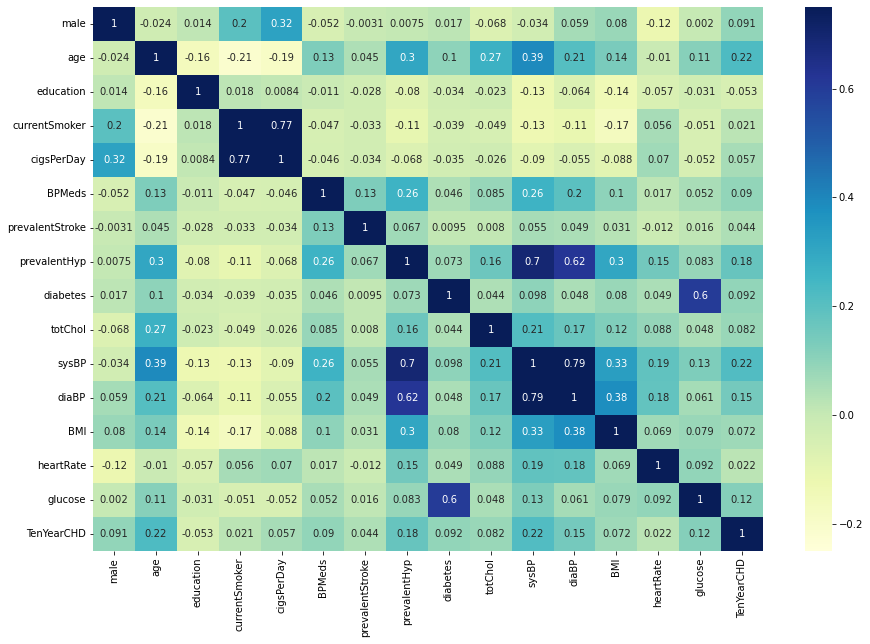

In [25]:
#generate the heatmap of correlation using another colour scale
plt.figure(figsize=(15,10))
sns.heatmap(corr_fhs,vmax=0.75, vmin=-0.25, cmap='YlGnBu', annot=True)
plt.show

# checking for outliers

In [26]:
#to filter out a subset of categorical variables
fhs_num = df_fhs.select_dtypes(include=['float64'])
fhs_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4036 entries, 0 to 4239
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   4036 non-null   float64
 1   cigsPerDay  4036 non-null   float64
 2   BPMeds      4036 non-null   float64
 3   totChol     4036 non-null   float64
 4   sysBP       4036 non-null   float64
 5   diaBP       4036 non-null   float64
 6   BMI         4036 non-null   float64
 7   heartRate   4036 non-null   float64
 8   glucose     4036 non-null   float64
dtypes: float64(9)
memory usage: 315.3 KB


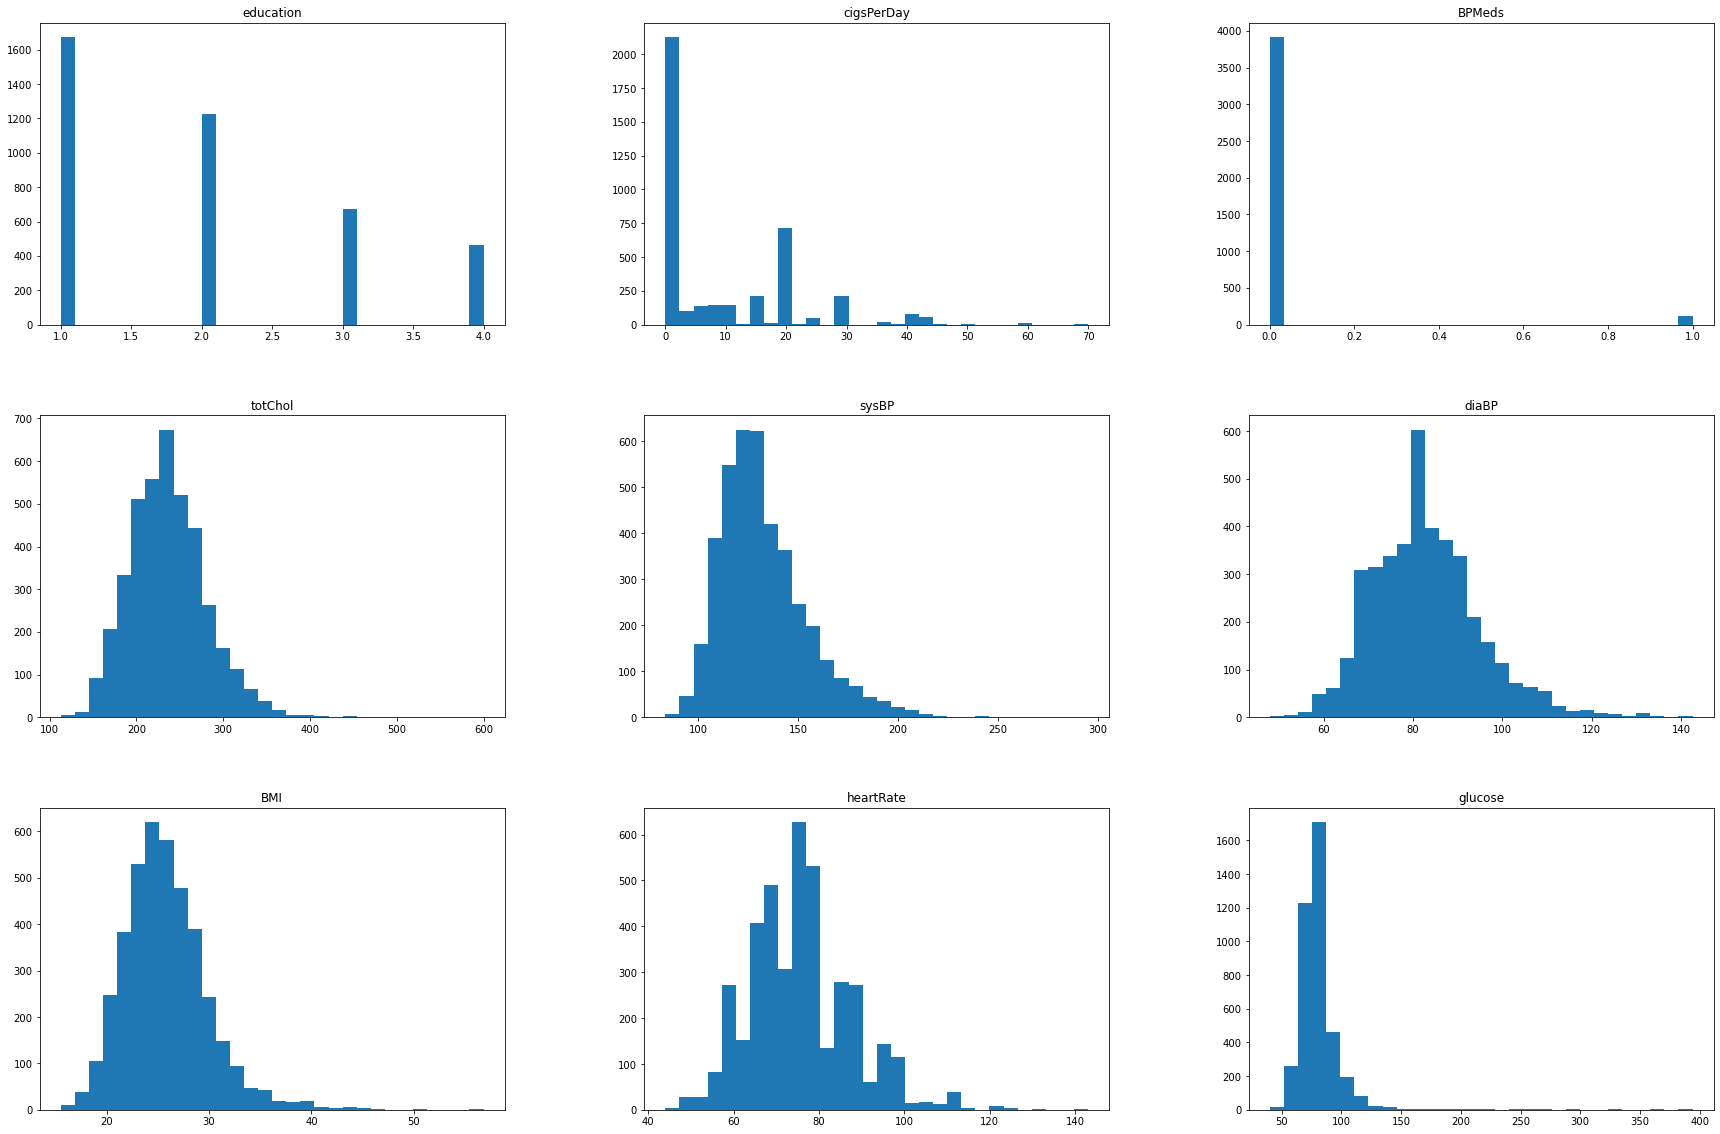

In [27]:
#plot of the distribution of the variables
fig, axis = plt.subplots(3,3, figsize = (30,20))
fhs_num.hist(ax = axis, bins =30 , grid = False)
plt.show()

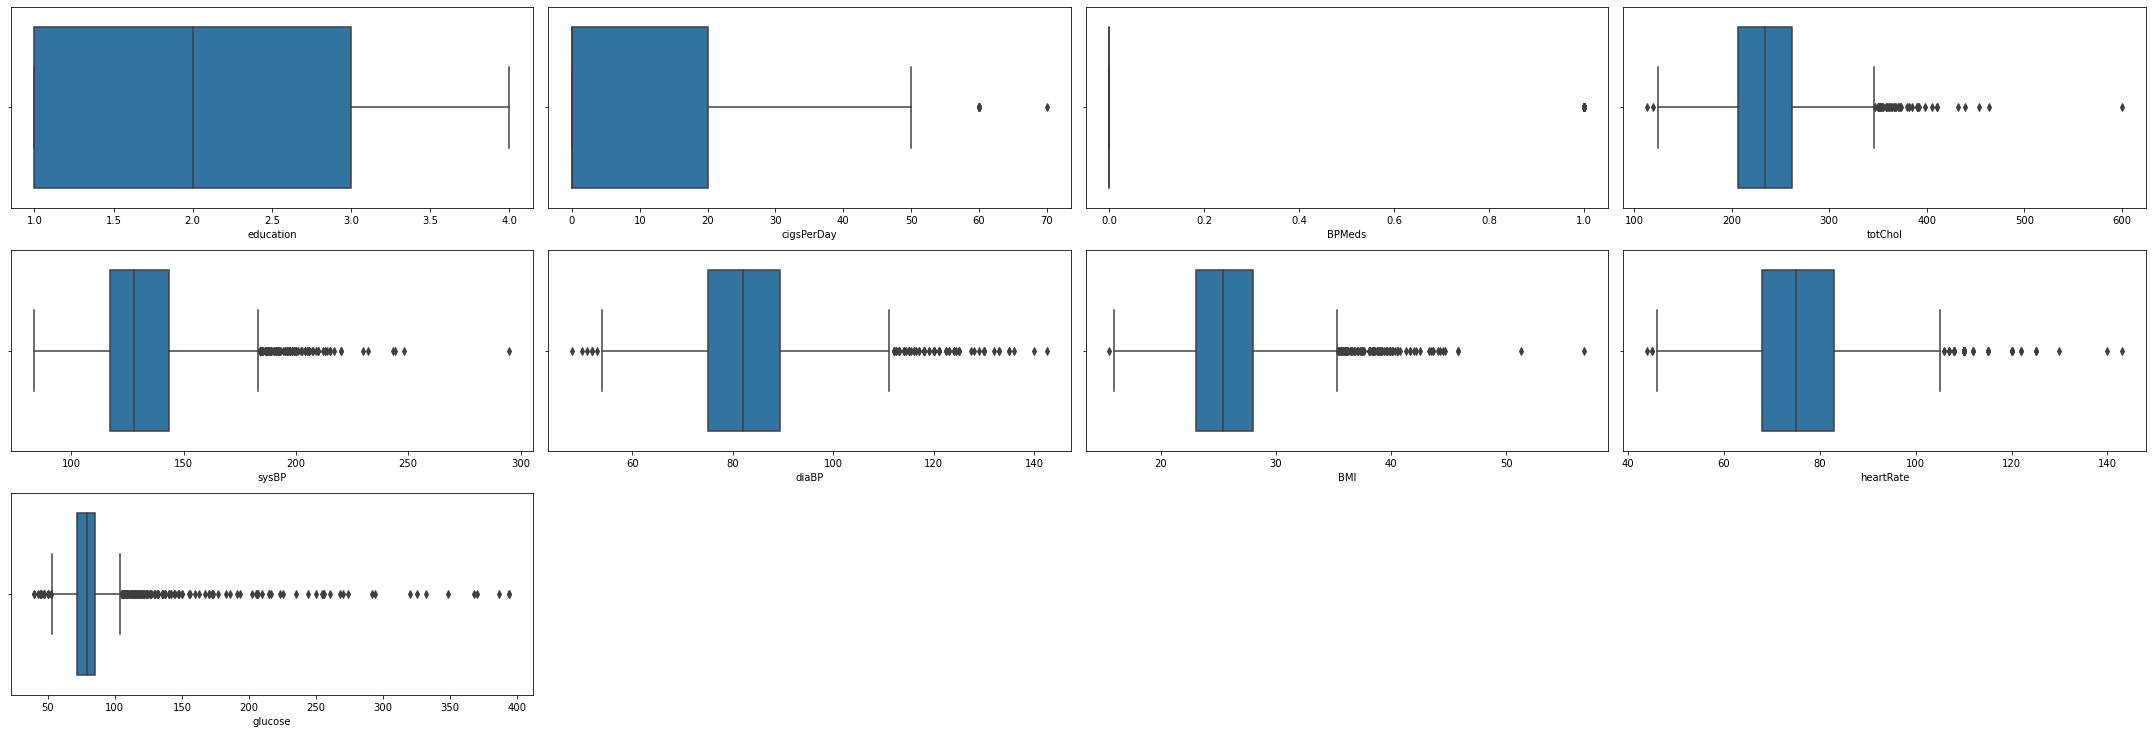

In [28]:
#generate boxplot for each variable
plt.figure(figsize = (30,20))
for i in enumerate (fhs_num.columns):
    plt.subplot(6,4, i[0]+1)
    sns.boxplot(x=i[1], data = fhs_num)
plt.tight_layout()

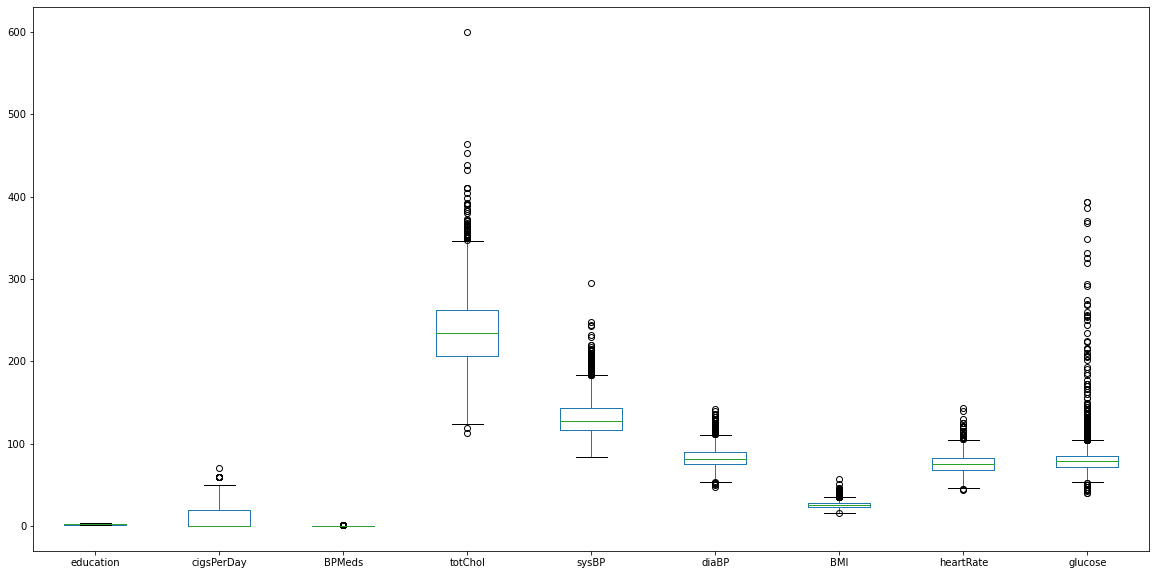

In [29]:
#boxplot for all the columns at a point
plt.figure(figsize=(20,10))
fhs_num.boxplot(grid=False)
plt.show()

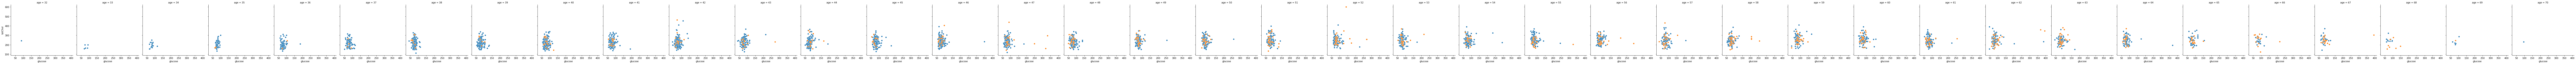

In [30]:
g = sns.FacetGrid(df_fhs, hue='TenYearCHD', col='age', height=4)
g.map(sns.scatterplot, "glucose", "totChol")
plt.show()

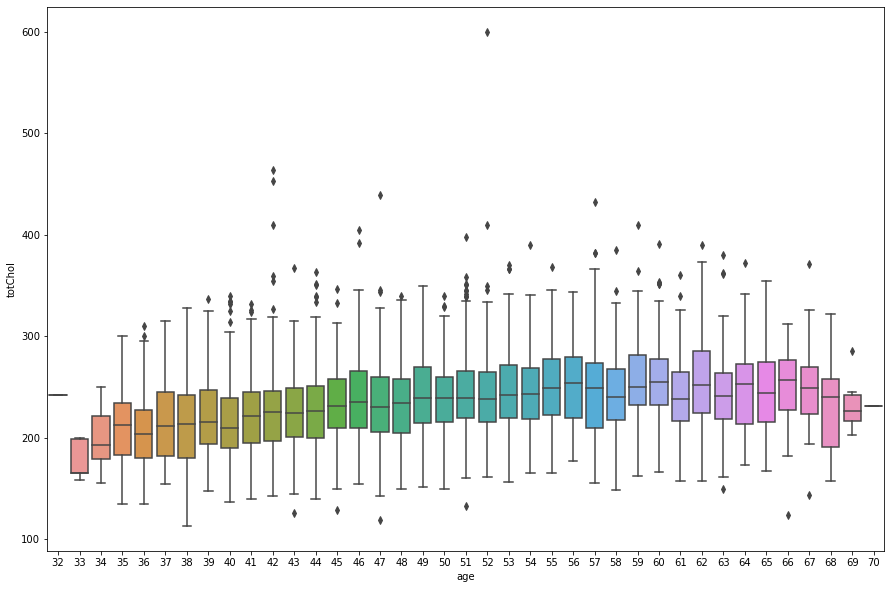

In [31]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=df_fhs, x='age', y='totChol', ax=ax)
plt.show()

In [32]:
fhs_cat = df_fhs.select_dtypes(exclude=['float64'])
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4036 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   male             4036 non-null   int64
 1   age              4036 non-null   int64
 2   currentSmoker    4036 non-null   int64
 3   prevalentStroke  4036 non-null   int64
 4   prevalentHyp     4036 non-null   int64
 5   diabetes         4036 non-null   int64
 6   TenYearCHD       4036 non-null   int64
dtypes: int64(7)
memory usage: 381.3 KB


In [33]:
df_fhs.nunique().sort_values()

male                  2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
TenYearCHD            2
education             4
cigsPerDay           33
age                  39
heartRate            73
glucose             139
diaBP               145
sysBP               232
totChol             245
BMI                1347
dtype: int64

In [34]:
#creating a subset of categorical variables that are labelled as float64
col_int = df_fhs.nunique().reset_index()
col_int.columns = ['features','categories']
col_int['categories'] = col_int['categories'].astype('int64')
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int.categories<10]
col_int.features.values

array(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD', 'education'],
      dtype=object)

In [35]:
#display subset of integer-type categorical variable
fhs_cat_int = df_fhs[col_int.features.values]
fhs_cat_int

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,education
0,1,0,0.000,0,0,0,0,4.000
1,0,0,0.000,0,0,0,0,2.000
2,1,1,0.000,0,0,0,0,1.000
3,0,1,0.000,0,1,0,1,3.000
4,0,1,0.000,0,0,0,0,3.000
...,...,...,...,...,...,...,...,...
4234,1,1,0.000,0,0,0,0,3.000
4236,0,1,0.000,0,0,0,0,1.000
4237,0,0,0.000,0,0,0,0,2.000
4238,1,0,0.000,0,1,0,0,3.000


In [36]:
fhs_cat_int = fhs_cat_int.drop(columns=['male'])
fhs_cat_int

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,education
0,0,0.000,0,0,0,0,4.000
1,0,0.000,0,0,0,0,2.000
2,1,0.000,0,0,0,0,1.000
3,1,0.000,0,1,0,1,3.000
4,1,0.000,0,0,0,0,3.000
...,...,...,...,...,...,...,...
4234,1,0.000,0,0,0,0,3.000
4236,1,0.000,0,0,0,0,1.000
4237,0,0.000,0,0,0,0,2.000
4238,0,0.000,0,1,0,0,3.000


In [37]:
fhs_cat['TenYearCHD'] = df_fhs['TenYearCHD']

C:\Users\onata\AppData\Local\Temp/ipykernel_38040/3434148314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhs_cat['TenYearCHD'] = df_fhs['TenYearCHD']


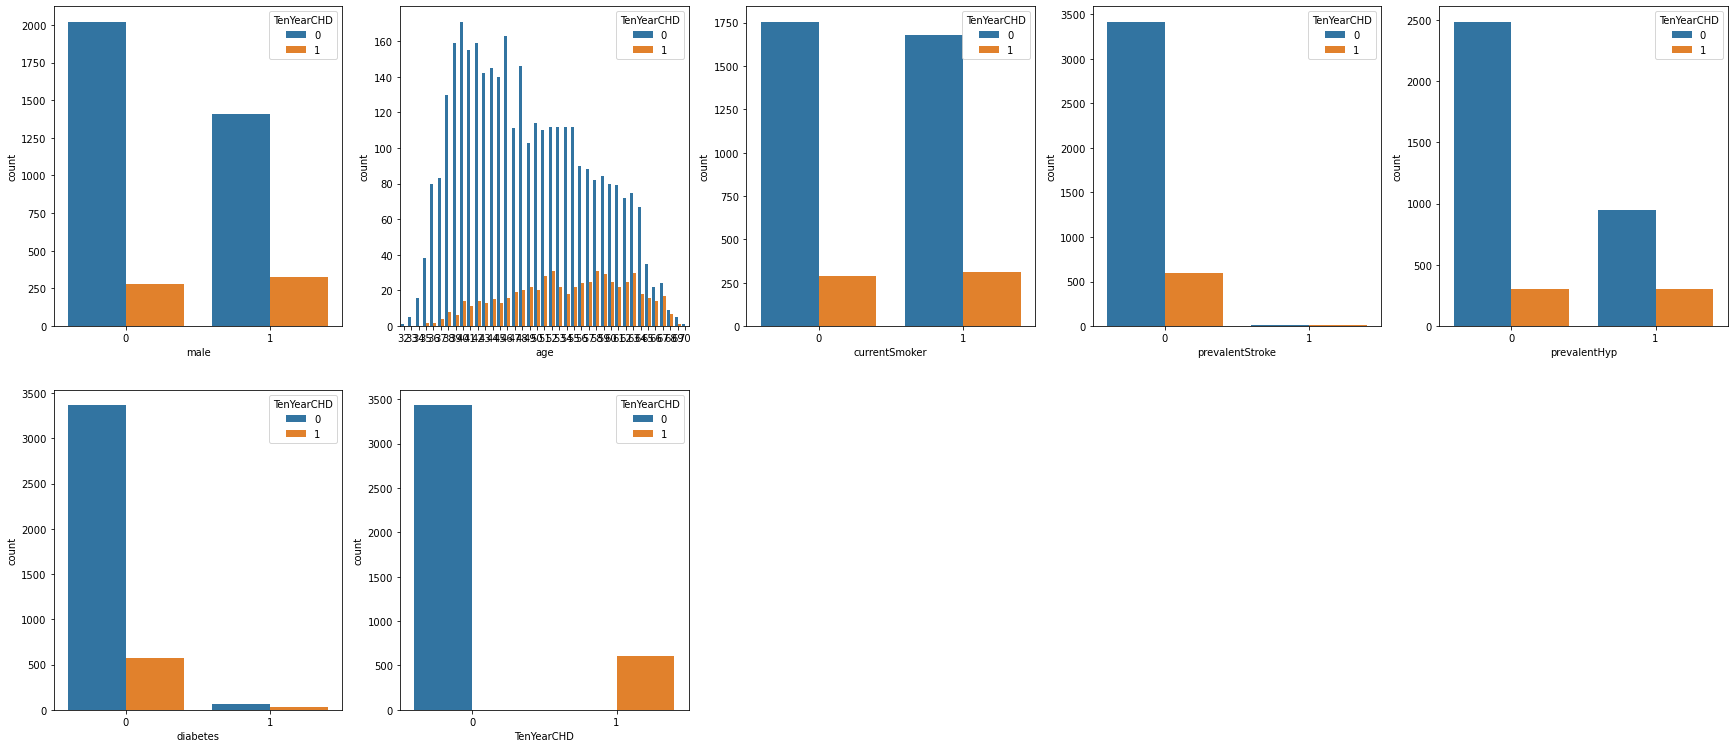

In [38]:
plt.figure(figsize = (30,20))
for i in enumerate(fhs_cat.columns):
    plt.subplot(3,5,i[0]+1)
    sns.countplot(x=i[1], hue = 'TenYearCHD', data = fhs_cat)

In [39]:
df_fhs['TenYearCHD'].value_counts(normalize=True)

0   0.850
1   0.150
Name: TenYearCHD, dtype: float64

In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
#to split the prediction columns
X = df_fhs[['diabetes', 'glucose', 'diaBP','prevalentHyp', 'sysBP','age']]

Y = df_fhs['TenYearCHD']


In [51]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state= 3)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train,Y_train)
results = model.score(X_test,Y_test)
results*100

83.98018166804295

In [54]:
#Logistic Regression model with Kfold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits = 10, random_state =7, shuffle = True)
model = LogisticRegression(solver= 'liblinear')
results = cross_val_score(model, X, Y , cv=kfold)
results.mean()*100, results.std()*100

(85.03476402230794, 0.7342216299742795)

In [56]:
#Logistic Regression model with Shuffle-split
from sklearn.model_selection import ShuffleSplit
kfold = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
model = LogisticRegression(solver= 'liblinear')
results = cross_val_score(model, X, Y , cv=kfold)
results.mean()*100, results.std()*100

(85.17326732673267, 0.9535326873395167)

In [57]:
#Logistic Regression model with 'accuracy' metric

kfold = KFold(n_splits = 10, random_state =42, shuffle = True)
model = LogisticRegression(solver= 'liblinear')
results = cross_val_score(model, X, Y , cv=kfold, scoring='accuracy')
results.mean()*100, results.std()*100

(85.10902144805051, 1.459637407329087)

In [59]:
#Logistic Regression model with AUC metric
kfold = KFold(n_splits = 10, random_state =7, shuffle = True)
model = LogisticRegression(solver= 'liblinear')
results = cross_val_score(model, X, Y , cv=kfold, scoring='roc_auc')
print('AUC: %.3f (%.3f)' % (results.mean(), results.std()))

AUC: 0.703 (0.033)


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<AxesSubplot:>

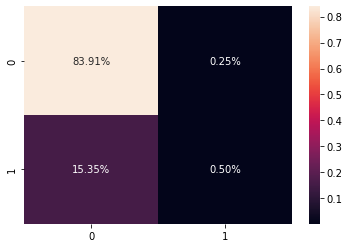

In [69]:
#confusion Matrix
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)
matrix = confusion_matrix(Y_test, pred_y)
sns.heatmap(matrix/np.sum(matrix),fmt = '.2%' , annot= True)

In [71]:
#Classification report
report = classification_report(Y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.91       680
           1       0.67      0.03      0.06       128

    accuracy                           0.84       808
   macro avg       0.76      0.51      0.49       808
weighted avg       0.82      0.84      0.78       808



In [81]:
#List of co efficients

coefficients  = model.coef_
coefficients



array([[ 0.45193967,  0.00365647, -0.01003458,  0.4434851 ,  0.01143416,
         0.0472282 ]])

In [82]:
coefficients = coefficients.ravel().tolist()

coefficients

[0.45193967374982463,
 0.0036564668228869107,
 -0.01003457593179242,
 0.44348510368022115,
 0.01143416027391328,
 0.047228204794458335]

In [83]:
features = list(X)
features

['diabetes', 'glucose', 'diaBP', 'prevalentHyp', 'sysBP', 'age']

In [84]:
data = {'Features':features , 'Coefficients': coefficients}

coeff_table = pd.DataFrame(data)
coeff_table.sort_values(by = 'Coefficients')

coeff_table

,Features,Coefficients
0,diabetes,0.452
1,glucose,0.004
2,diaBP,-0.010
3,prevalentHyp,0.443
4,sysBP,0.011
5,age,0.047


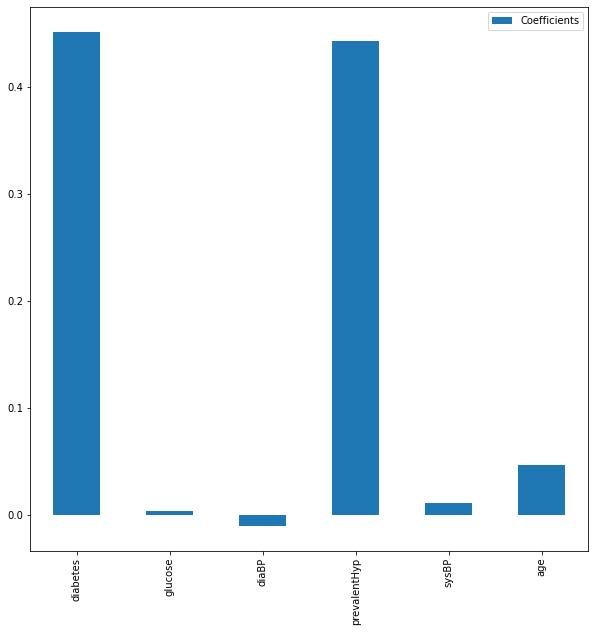

In [91]:
#Plot of the variables

coeff_table.plot(kind = 'bar', figsize = (10,10))
plt.xticks(np.arange(0,6), features)
plt.show()